In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score


In [5]:
df = pd.read_csv("data/Country-data.csv")
df_data_dic = pd.read_csv("data/data-dictionary.csv")
df_data_dic.pop('Description')

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
mean_res = [None]
var_res = [None]
st_dev_res = [None]
for col_name in df.iloc[:, 1:]:
    mean_res.append(np.mean(df[col_name]))
    var_res.append(np.var(df[col_name]))
    st_dev_res.append(np.sqrt(np.var(df[col_name])))

#On crée les nouvelles colonnes pour ajouté de nouvelle donnée au csv
df_data_dic["Mean"] = mean_res
df_data_dic["Variance"] = var_res
df_data_dic["Standard Deviation"] = st_dev_res

df_data_dic

,Unnamed: 0,Column Name,Mean,Variance,Standard Deviation
0,0,country,NaN,NaN,NaN
1,1,child_mort,38.270060,1.616684e+03,40.208005
2,2,exports,41.108976,7.469188e+02,27.329815
3,3,health,6.815689,7.499936e+00,2.738601
4,4,imports,46.890215,5.825946e+02,24.136996
5,5,Income,17144.688623,3.694185e+08,19220.262267
6,6,Inflation,7.781832,1.110707e+02,10.539008
7,7,life_expec,70.555689,7.861492e+01,8.866506
8,8,total_fer,2.947964,2.278011e+00,1.509308
9,9,gdpp,12964.155689,3.339298e+08,18273.746050


In [7]:
fig = sp.make_subplots(rows=1, cols=9)

# Ajouter les boxplots pour chaque variable dans les sous-graphiques correspondants
for i, col in enumerate(df.iloc[:, 1:].columns):
    fig.add_trace(go.Box(x=[col]*len(df), y=df[col], name=col), row=1, col=i+1)

# Mettre en forme le titre et les étiquettes des axes
fig.update_layout(
    title='Boxplots des Variables',
    yaxis=dict(title='Valeurs')
)

# Afficher le graphique
fig.show()

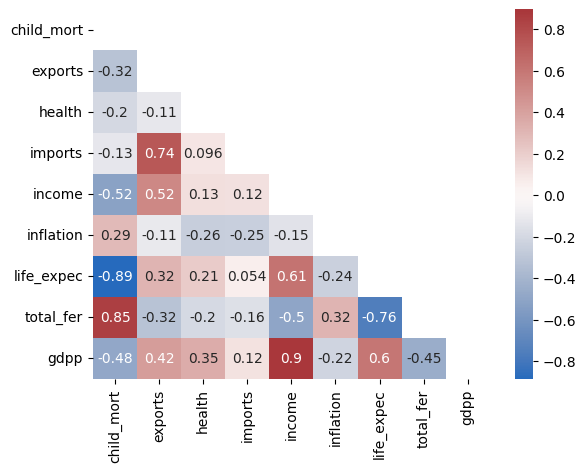

In [8]:
# Calculer la matrice de corrélation
mat_corr = df.iloc[:, 1:].corr()

# Créer un masque pour la moitié inférieure
mask = np.triu(np.ones_like(mat_corr, dtype=bool))

# Définir une colormap personnalisée
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Créer la heatmap avec le masque et la colormap personnalisée
sns.heatmap(mat_corr, mask=mask, annot=True, cmap="vlag",center=0)

# Afficher la figure
plt.show()

In [9]:
px.histogram(df.sort_values('child_mort',ascending=False), x='country', y='child_mort')

In [10]:
def view_distribution(df,feature,is_ascending):
    px.histogram(df.sort_values(feature,ascending=is_ascending).head(10), x='country', y=feature).show()

In [11]:
view_distribution(df,'gdpp',False)

     child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3  

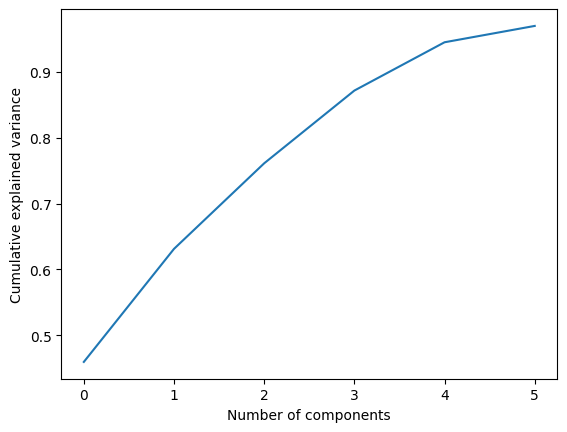

In [12]:
# Créer un pipeline de prétraitement de données
from sklearn.decomposition import PCA


pre_trait = StandardScaler()


pipeline = Pipeline([
    ('pre_trait', pre_trait)  # Etape 2 : standardisation des données
])

donnees_pretraitees = pipeline.fit_transform(df.iloc[:, 1:])

df_pretraite = pd.DataFrame(donnees_pretraitees, columns=df.columns[1:], index=df.index)
print(df_pretraite)

pca = PCA(n_components=0.95)
pca.fit(df_pretraite)
# Plot the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(False)

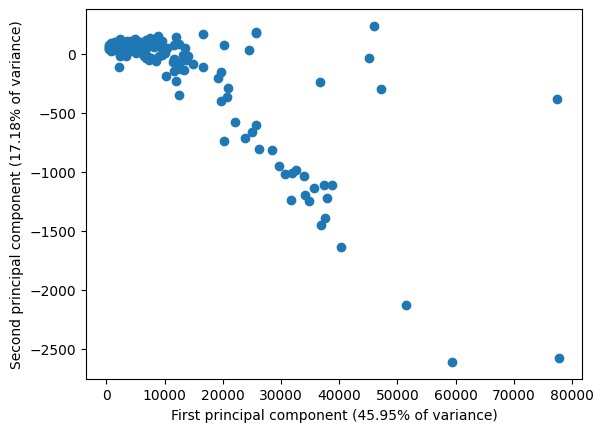

In [13]:
# Get the explained variance ratios for the selected components
variance_ratios = pca.explained_variance_ratio_

plt.figure()
plt.scatter(pca.transform(df.iloc[:,1:])[:, 0], pca.transform(df.iloc[:,1:])[:, 1])
plt.xlabel('First principal component ({}% of variance)'.format(round(variance_ratios[0] * 100, 2)))
plt.ylabel('Second principal component ({}% of variance)'.format(round(variance_ratios[1] * 100, 2)))
plt.grid(False)

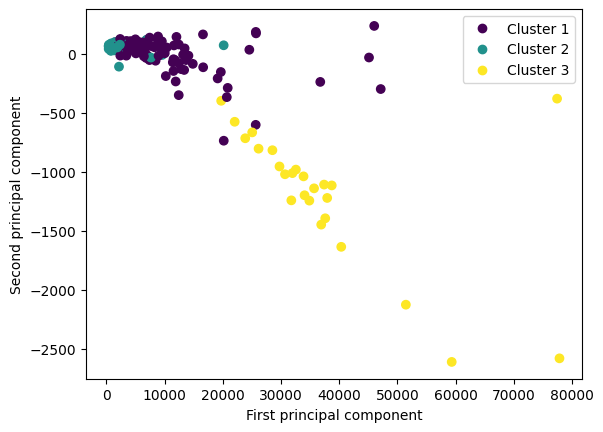

In [14]:
from sklearn.cluster import KMeans

# Create pipeline
pipe = Pipeline(
    [("Pré traitement de la data", pre_trait),
     ("Reduction de la dimension", PCA(n_components=0.95)),
     ("Clustering", SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
    #("Clustering", KMeans(n_clusters=3, random_state=0)
      )])

#On retire la colone Country
pipe.fit(df.iloc[:, 1:])
labels = pipe.steps[-1][1].labels_

#On visualise les clusters
plt.figure()
scatter = plt.scatter(pca.transform(df.iloc[:, 1:])[:, 0], pca.transform(df.iloc[:, 1:])[:, 1], c=labels)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.grid(False)

# Ajouter une légende
classes = ['Cluster 1', 'Cluster 2', 'Cluster 3']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

plt.show()

#On ajoute les labels de clasification au dataframe
df["classification"] = labels


In [15]:
print(df.to_string())

                            country  child_mort  exports  health   imports  income  inflation  life_expec  total_fer    gdpp  classification
0                       Afghanistan        90.2   10.000    7.58   44.9000    1610      9.440        56.2       5.82     553               1
1                           Albania        16.6   28.000    6.55   48.6000    9930      4.490        76.3       1.65    4090               0
2                           Algeria        27.3   38.400    4.17   31.4000   12900     16.100        76.5       2.89    4460               0
3                            Angola       119.0   62.300    2.85   42.9000    5900     22.400        60.1       6.16    3530               1
4               Antigua and Barbuda        10.3   45.500    6.03   58.9000   19100      1.440        76.8       2.13   12200               0
5                         Argentina        14.5   18.900    8.10   16.0000   18700     20.900        75.8       2.37   10300               0
6            

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



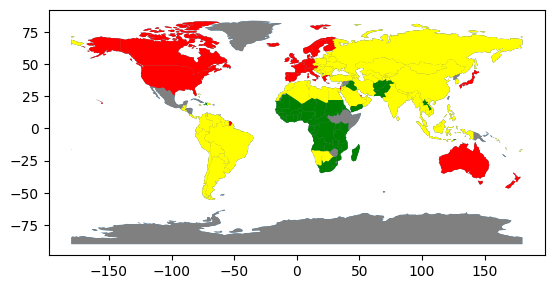

In [16]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot()

#Initialisation de la carte en gris
for i in range(len(world.name)):
    world[world.name == world.name[i]].plot(color='grey',ax=ax)
    
#coloration de la carte en fonction des clusters
for i in range(len(df.country)):
    match df.classification[i]:
        case 0:
            world[world.name == df.country[i]].plot(color='yellow',ax=ax)
        case 1:
            world[world.name == df.country[i]].plot(color='green',ax=ax)
        case 2:
            world[world.name == df.country[i]].plot(color='red',ax=ax)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='auto' is dep

Best score:  0.7003508044174154
Best params:  {'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 3, 'max_iter': 300}


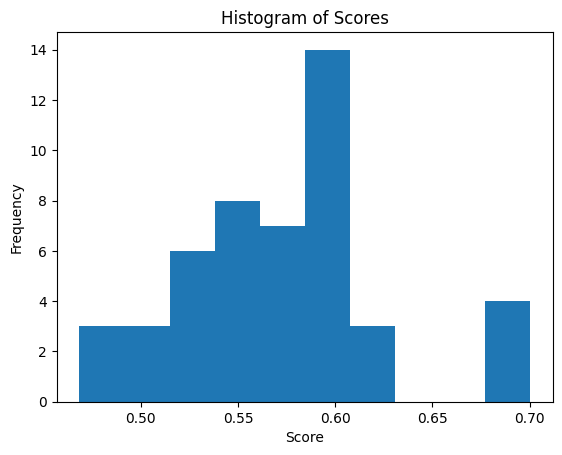

In [17]:
def make_generator(parameters):
    if not parameters:
        yield dict()
    else:
        key_to_iterate = list(parameters.keys())[0]
        next_round_parameters = {p : parameters[p]
                    for p in parameters if p != key_to_iterate}
        for val in parameters[key_to_iterate]:
            for pars in make_generator(next_round_parameters):
                temp_res = pars
                temp_res[key_to_iterate] = val
                yield temp_res


# add fix parameters - here - it's just a random one
fixed_params = {"max_iter":300 }
_data = df.iloc[:,1:]
param_grid = {"n_clusters": range(3, 11),
              "init": ['k-means++', 'random'],
              "algorithm": ['auto', 'full', 'elkan']}

best_score = -1
best_params = {}
scores = []
for params in make_generator(param_grid):
    params.update(fixed_params)
    ca = KMeans( **params )
    ca.fit(_data)
    score = silhouette_score(_data, ca.labels_, metric='euclidean')
    scores.append(score)
    if score > best_score:
        best_score = score
        best_params = params

print("Best score: ", best_score)
print("Best params: ", best_params)
plt.hist(scores)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

In [18]:
def run_clustering_algorithm(data, algorithm_type, fixed_params, param_grid, metric="euclidean"):
    # define the generator function
    def make_generator(parameters):
        if not parameters:
            yield dict()
        else:
            key_to_iterate = list(parameters.keys())[0]
            next_round_parameters = {p : parameters[p]
                        for p in parameters if p != key_to_iterate}
            for val in parameters[key_to_iterate]:
                for pars in make_generator(next_round_parameters):
                    temp_res = pars
                    temp_res[key_to_iterate] = val
                    yield temp_res

    # initialize variables for tracking best score and params
    best_score = -1
    best_params = {}
    scores = []

    # iterate over parameter grid
    for params in make_generator(param_grid):
        # update with fixed params
        params.update(fixed_params)

        # create clustering algorithm object
        if algorithm_type == "spectral":
            clustering_algorithm = SpectralClustering(**params)
        elif algorithm_type == "kmeans":
            clustering_algorithm = KMeans(**params)
        else:
            raise ValueError("Invalid algorithm type. Must be 'spectral' or 'kmeans'.")

        # fit and score the clustering algorithm
        clustering_algorithm.fit(data)
        score = silhouette_score(data, clustering_algorithm.labels_, metric=metric)
        scores.append(score)

        # update best score and params if applicable
        if score > best_score:
            best_score = score
            best_params = params

    # print best score and params
    print("Best score: ", best_score)
    print("Best params: ", best_params)

    # plot histogram of scores
    plt.hist(scores)
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.title('Histogram of Scores')
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning:

G

Best score:  0.44731769014554973
Best params:  {'assign_labels': 'discretize', 'n_neighbors': 20, 'affinity': 'nearest_neighbors', 'n_clusters': 4, 'n_init': 10}


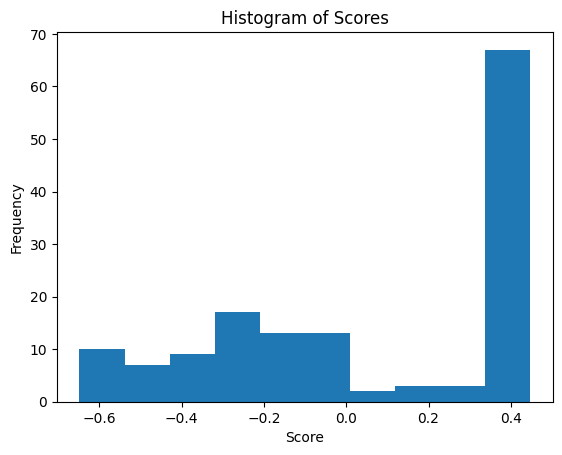

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='auto' is dep

Best score:  0.7003508044174154
Best params:  {'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 3, 'max_iter': 300}


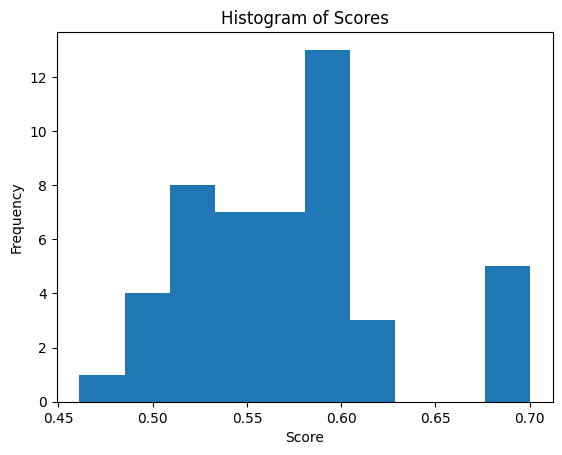

In [19]:
_data = df.iloc[:,1:]

fixed_params_spectral = {"n_init":10}
param_grid_spectral = {"n_clusters": range(2, 11),
                      "affinity": ['nearest_neighbors', 'rbf'],
                      "n_neighbors": [5, 10, 20, 30],
                      "assign_labels": ['kmeans', 'discretize']}
run_clustering_algorithm(_data, "spectral", fixed_params_spectral, param_grid_spectral)

fixed_params_kmeans = {"max_iter":300}
param_grid_kmeans = {"n_clusters": range(3, 11),
                      "init": ['k-means++', 'random'],
                      "algorithm": ['auto', 'full', 'elkan']}
run_clustering_algorithm(_data, "kmeans", fixed_params_kmeans, param_grid_kmeans)